# Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data = https://drive.google.com/file/d/1fcrZdCX3d6pgEBmxGsZZlRhhm7G64CB_/view
df = pd.read_csv("https://raw.githubusercontent.com/mariasihotang/digitalskola_ds19/main/Dataset3_Car_Price.csv")

In [ ]:
df.head()

,make_model,body_type,body_type.1,km,Gearing Type,price
0,Audi A1,Sedans,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,Sedans,16200,Automatic,16790


# Data Understanding

In [ ]:
# Check columns name
df.columns

Index(['make_model', 'body_type', 'body_type.1', 'km', 'Gearing Type',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   body_type.1   4800 non-null   object
 3   km            4800 non-null   int64 
 4   Gearing Type  4800 non-null   object
 5   price         4800 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 225.1+ KB


In [ ]:
# Check missing value
df.isna().sum()

make_model      0
body_type       0
body_type.1     0
km              0
Gearing Type    0
price           0
dtype: int64

In [ ]:
# Numerical value
df.describe()

,km,price
count,4800.000000,4800.000000
mean,31912.910417,19722.871875
std,35899.452772,4337.519969
min,0.000000,5555.000000
25%,4700.000000,15990.000000
50%,20005.000000,19588.000000
75%,47800.000000,22692.500000
max,291800.000000,56100.000000


In [ ]:
# Categorical value
df.describe(include=['object'])

,make_model,body_type,body_type.1,Gearing Type
count,4800,4800,4800,4800
unique,3,7,7,3
top,Audi A3,Sedans,Sedans,Manual
freq,2642,3495,3495,2435


In [ ]:
df['Gearing Type'].value_counts()

Manual            2435
Automatic         2092
Semi-automatic     273
Name: Gearing Type, dtype: int64

In [ ]:
df['make_model'].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: make_model, dtype: int64

In [ ]:
df['body_type'].value_counts()

Sedans           3495
Compact          1011
Station wagon     260
Other              21
Convertible         7
Coupe               5
Off-Road            1
Name: body_type, dtype: int64

In [ ]:
df['price'].value_counts()

22900    75
21900    64
15900    62
21500    60
20900    56
         ..
11993     1
22140     1
12860     1
22080     1
24987     1
Name: price, Length: 1155, dtype: int64

In [ ]:
df.head()

,make_model,body_type,body_type.1,km,Gearing Type,price
0,Audi A1,Sedans,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,Sedans,16200,Automatic,16790


# EDA

## Distribution of Price

Text(0.5, 1.0, 'Distribution of Price')

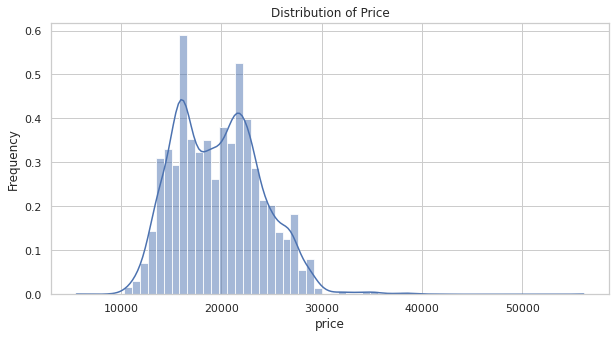

In [ ]:
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.histplot(df['price'], kde=True, palette = 'deep', stat = 'frequency')
plt.title('Distribution of Price')

In [ ]:
df['price'].value_counts().head(20)

22900    75
21900    64
15900    62
21500    60
20900    56
16900    51
19900    51
13500    47
18900    45
22500    44
14990    43
18500    41
23900    40
15850    39
20500    38
24900    37
23500    32
17900    32
19990    31
16500    29
Name: price, dtype: int64

## Check per Gearing Type

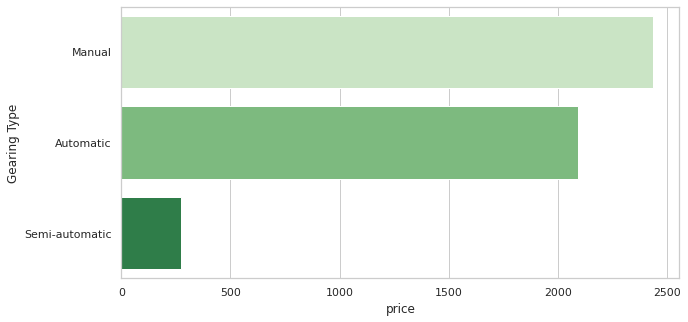

In [ ]:
price = df['price'].groupby(df['Gearing Type']).count().sort_values(ascending=False)
f,ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.barplot(price.head(), price.head().index, palette = 'Greens')

In [ ]:
df.groupby('Gearing Type')['price'].count().sort_values(ascending=False)

Gearing Type
Manual            2435
Automatic         2092
Semi-automatic     273
Name: price, dtype: int64

## Percentage of Make model

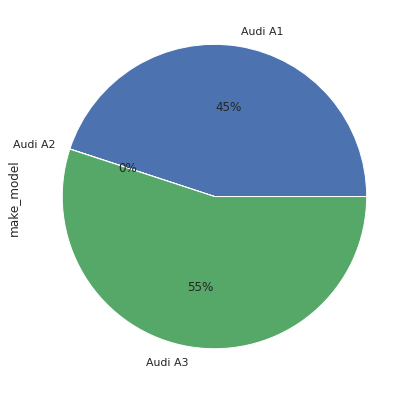

In [ ]:
data = df.groupby("make_model")['make_model'].count()
pie, ax = plt.subplots(figsize=[10,7])
data.plot.pie(autopct="%.f%%")

In [ ]:
df['make_model'].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: make_model, dtype: int64

## Price per body type

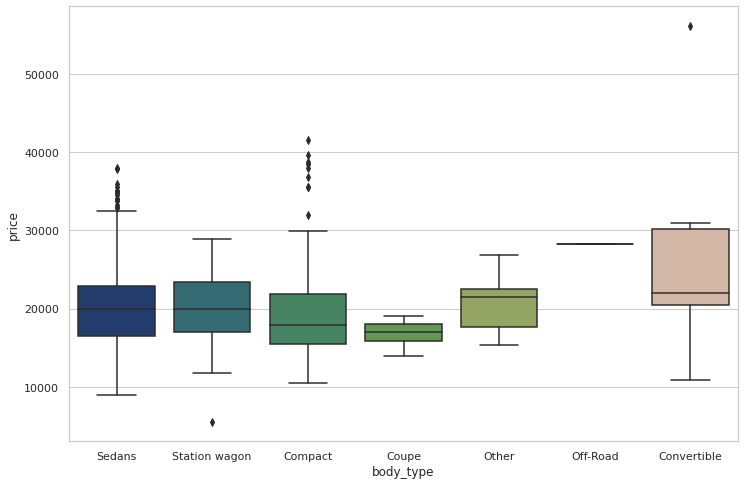

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(x='body_type', y='price', data=df, palette='gist_earth')

In [ ]:
df.groupby('body_type')['price'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
body_type,,,,
Compact,18821.907023,10490,41495,17880.0
Convertible,27184.714286,10893,56100,22000.0
Coupe,16768.000000,13950,19000,16990.0
Off-Road,28200.000000,28200,28200,28200.0
Other,20764.285714,15300,26900,21490.0
Sedans,19931.802289,8999,38000,19900.0
Station wagon,20156.942308,5555,28890,19990.0


## Price per model

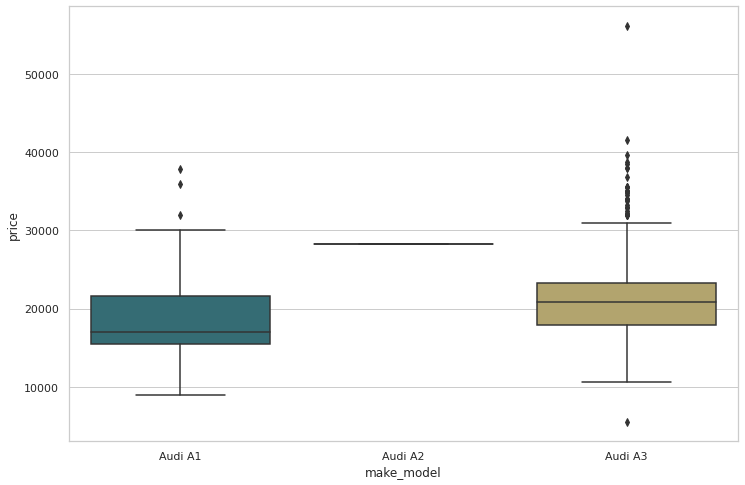

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(x='make_model', y='price', data=df, palette='gist_earth')

In [ ]:
df.groupby('make_model')['price'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
make_model,,,,
Audi A1,18560.871117,8999,37900,16950.0
Audi A2,28200.000000,28200,28200,28200.0
Audi A3,20668.352006,5555,56100,20900.0


## Price, km, body type correlation

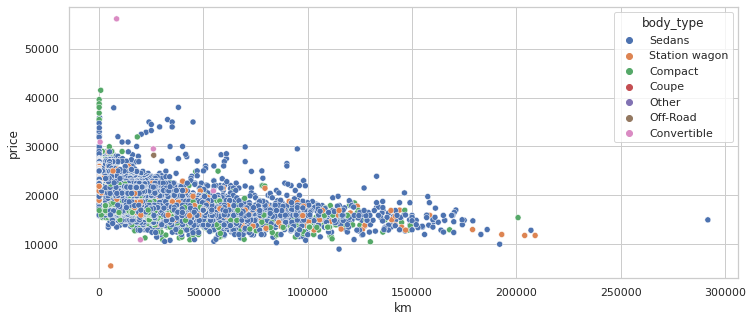

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.scatterplot(data=df, x="km", y="price", hue='body_type', palette='deep')

In [ ]:
df.loc[df['km'] > 250000]

,make_model,body_type,body_type.1,km,Gearing Type,price
2478,Audi A3,Sedans,Sedans,291800,Manual,14980


In [ ]:
df.loc[df['price'] < 8000]

,make_model,body_type,body_type.1,km,Gearing Type,price
2670,Audi A3,Station wagon,Station wagon,5558,Manual,5555


In [ ]:
df.loc[df['price'] > 50000]

,make_model,body_type,body_type.1,km,Gearing Type,price
3002,Audi A3,Convertible,Convertible,8364,Semi-automatic,56100


In [ ]:
df.groupby('km')['price'].count().head(20)

km
0     235
1     107
2       1
5       2
6       1
7       9
8       2
9       2
10    341
11     11
12     12
14      1
15     20
17      1
19      1
20     22
22      3
23      1
24      2
25      8
Name: price, dtype: int64

Based on the visualization above:
1. Among 3 gearing type which are: Manual, Semi-Automatic, and Automatic. Manual got the highest number.
2. Audi A3 got the highest amount between Audi A1 and Audi A2.
3. Offroad (Audi A2) got the highest price than other body type.
4. All the Audi A1, A2, A3 have range price between 5555 - 56.100 and km between 0 - 291.800 

#Data Preprocessing

In [ ]:
# Delete duplicate column
df.drop(columns=['body_type.1'], inplace=True)

In [ ]:
# Drop Audi A2
df = df[df['make_model'] != 'Audi A2']

In [ ]:
# Change Convertible and Coupe become Other
df.replace(['Convertible','Coupe'],['Other','Other'], inplace=True)

In [ ]:
# Check duplicate value
df[df.duplicated(keep='first')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 75 to 4799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    648 non-null    object
 1   body_type     648 non-null    object
 2   km            648 non-null    int64 
 3   Gearing Type  648 non-null    object
 4   price         648 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 30.4+ KB


In [ ]:
# Drop duplicate value
df1 = df.drop_duplicates(keep='first')

In [ ]:
# Drop outliers
df1.drop(df1.loc[df1['km'] > 250000].index, inplace=True)
df1.drop(df1.loc[df1['price'] > 50000].index, inplace=True)
df1.drop(df1.loc[df1['price'] < 6000].index, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 4797
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4148 non-null   object
 1   body_type     4148 non-null   object
 2   km            4148 non-null   int64 
 3   Gearing Type  4148 non-null   object
 4   price         4148 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 194.4+ KB


In [ ]:
df1.describe()

,km,price
count,4148.000000,4148.000000
mean,33960.907425,19445.439730
std,36014.922437,4219.456928
min,0.000000,8999.000000
25%,7100.000000,15984.500000
50%,22321.000000,19000.000000
75%,49999.250000,22200.000000
max,209000.000000,41495.000000


In [ ]:
df1.describe(include='object')

,make_model,body_type,Gearing Type
count,4148,4148,4148
unique,2,4,3
top,Audi A3,Sedans,Manual
freq,2283,3068,2109


# Feature engineering

## Feature encoding

In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,make_model,body_type,km,Gearing Type,price
0,Audi A1,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,16200,Automatic,16790


In [ ]:
df2 = pd.get_dummies(df2)
print(df2.shape)

(4148, 11)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 4797
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4148 non-null   int64
 1   price                        4148 non-null   int64
 2   make_model_Audi A1           4148 non-null   uint8
 3   make_model_Audi A3           4148 non-null   uint8
 4   body_type_Compact            4148 non-null   uint8
 5   body_type_Other              4148 non-null   uint8
 6   body_type_Sedans             4148 non-null   uint8
 7   body_type_Station wagon      4148 non-null   uint8
 8   Gearing Type_Automatic       4148 non-null   uint8
 9   Gearing Type_Manual          4148 non-null   uint8
 10  Gearing Type_Semi-automatic  4148 non-null   uint8
dtypes: int64(2), uint8(9)
memory usage: 133.7 KB


In [ ]:
df2.reset_index(inplace=True)
df2.head()

,index,km,price,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Other,body_type_Sedans,body_type_Station wagon,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic
0,0,56013,15770,1,0,0,0,1,0,1,0,0
1,1,80000,14500,1,0,0,0,1,0,1,0,0
2,2,83450,14640,1,0,0,0,1,0,1,0,0
3,3,73000,14500,1,0,0,0,1,0,1,0,0
4,4,16200,16790,1,0,0,0,1,0,1,0,0


In [ ]:
df2 = df2[['km','make_model_Audi A1','make_model_Audi A3', 'body_type_Compact',
       'body_type_Sedans', 'body_type_Station wagon', 'body_type_Other', 'Gearing Type_Automatic', 
       'Gearing Type_Manual', 'Gearing Type_Semi-automatic','price']]
df2.head()

,km,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Sedans,body_type_Station wagon,body_type_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,price
0,56013,1,0,0,1,0,0,1,0,0,15770
1,80000,1,0,0,1,0,0,1,0,0,14500
2,83450,1,0,0,1,0,0,1,0,0,14640
3,73000,1,0,0,1,0,0,1,0,0,14500
4,16200,1,0,0,1,0,0,1,0,0,16790


In [ ]:
df2['results'] = pd.qcut(df2['price'], q=4, labels=['Bronze','Silver','Gold','Platinum'])
df2.head()

,km,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Sedans,body_type_Station wagon,body_type_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,price,results
0,56013,1,0,0,1,0,0,1,0,0,15770,Bronze
1,80000,1,0,0,1,0,0,1,0,0,14500,Bronze
2,83450,1,0,0,1,0,0,1,0,0,14640,Bronze
3,73000,1,0,0,1,0,0,1,0,0,14500,Bronze
4,16200,1,0,0,1,0,0,1,0,0,16790,Silver


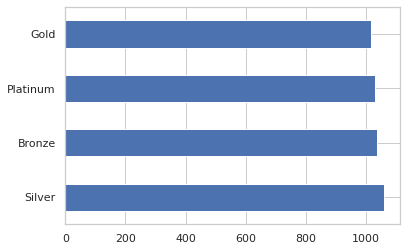

In [ ]:
df2['results'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
df2['results'].value_counts()

Silver      1061
Bronze      1037
Platinum    1032
Gold        1018
Name: results, dtype: int64

In [ ]:
df2.replace({'results':{'Bronze':0, 'Silver':1, 'Gold':2, 'Platinum':3}}, inplace=True)
df2.head(10)

,km,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Sedans,body_type_Station wagon,body_type_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,price,results
0,56013,1,0,0,1,0,0,1,0,0,15770,0
1,80000,1,0,0,1,0,0,1,0,0,14500,0
2,83450,1,0,0,1,0,0,1,0,0,14640,0
3,73000,1,0,0,1,0,0,1,0,0,14500,0
4,16200,1,0,0,1,0,0,1,0,0,16790,1
5,63668,1,0,0,1,0,0,1,0,0,15090,0
6,62111,1,0,0,0,1,0,1,0,0,16422,1
7,14986,1,0,1,0,0,0,1,0,0,14480,0
8,57000,1,0,0,1,0,0,1,0,0,16700,1
9,16103,1,0,0,1,0,0,1,0,0,17990,1


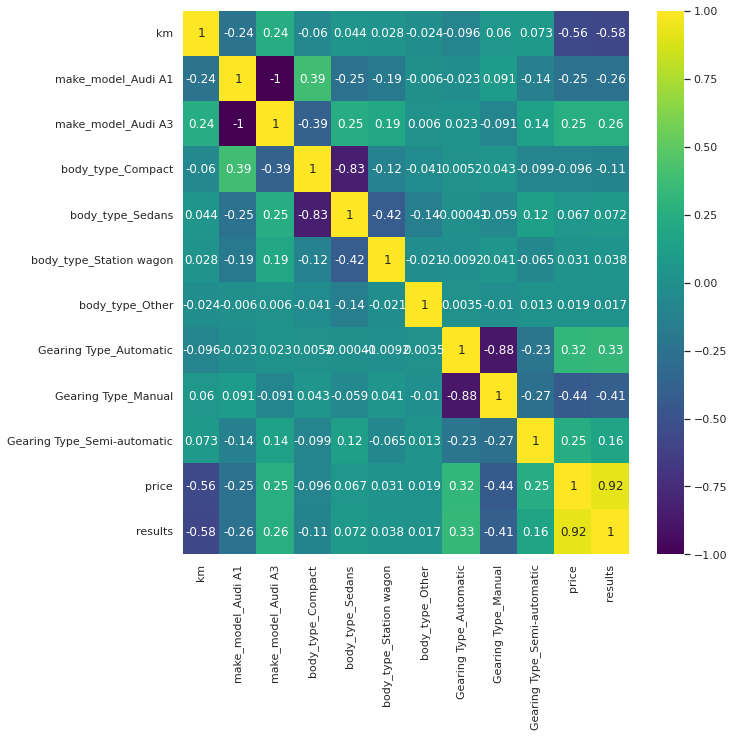

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df2.corr(), annot=True, cmap='viridis')

## Feature Scaling

Advantages:

- Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
- Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
- Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

Disadvantages:
- Standardization: not good if the data is not normally distributed (i.e. no Gaussian Distribution).
- Normalization: get influenced heavily by outliers (i.e. extreme values).
- Robust Scaler: doesn't take the median into account and only focuses on the parts where the bulk data is.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = scaler.transform(df2)

## Split train test

In [ ]:
x = df2.drop('price', axis=1)
y = df2['price']

In [ ]:
x.shape, y.shape

((4148, 11), (4148,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


- X_train: Untuk menampung data source yang akan dilatih.
- X_test: Untuk menampung data target yang akan dilatih.
- y_train: Untuk menampung data source yang akan digunakan untuk testing.
- y_test: Untuk menampung data target yang akan digunakan untuk testing.

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3318, 11), (830, 11), (3318,), (830,))

# Modeling 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Linear regression

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

In [ ]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model is: ", linreg_mae)
print("R2 Score of linear regression model is: ", linreg_r2)

MAE of linear regression model is:  1103.5402630805156
R2 Score of linear regression model is:  0.871133955648569


In [ ]:
linreg_score = cross_val_score(linreg, x_test, y_test, cv=4)
print("Linear regression accuracy is:", linreg_score.mean()*100)

Linear regression accuracy is: 86.8218975663074


## Decision tree

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg_pred = dt_reg.predict(x_test)

In [ ]:
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
print("MAE of decision tree regression model is: ", dt_reg_mae)
print("R2 Score of decision tree regression model is: ", dt_reg_r2)

MAE of decision tree regression model is:  1048.3925198060192
R2 Score of decision tree regression model is:  0.8506097758948209


In [ ]:
dt_score = cross_val_score(dt_reg, x_test, y_test, cv=4)
print("Decision tree model accuracy is:", dt_score.mean()*100)

Decision tree model accuracy is: 78.29702726710124


## Random Forest 

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg_pred = rf_reg.predict(x_test)

In [ ]:
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)
print("MAE of random forest regressor model is: ", rf_reg_mae)
print("R2 Score of random forest regressor model is: ", rf_reg_r2)

MAE of random forest regressor model is:  932.1484469254615
R2 Score of random forest regressor model is:  0.8904194723301303


In [ ]:
rf_score = cross_val_score(rf_reg, x_test, y_test, cv=4)
print("Random forest model accuracy is:", rf_score.mean()*100)

Random forest model accuracy is: 85.9963335073742


## Gradient Boosting

In [ ]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
gb_reg_pred = gb_reg.predict(x_test)

In [ ]:
gb_reg_mae = mean_absolute_error(y_test, gb_reg_pred)
gb_reg_r2 = r2_score(y_test, gb_reg_pred)
print("MAE of gradient boosting model is: ", gb_reg_mae)
print("R2 Score of gradient boosting model is: ", gb_reg_r2)

MAE of gradient boosting model is:  927.6957629203664
R2 Score of gradient boosting model is:  0.9068091115335845


In [ ]:
gb_score = cross_val_score(gb_reg, x_test, y_test, cv=4)
print("Gradient boosting model accuracy is:", gb_score.mean()*100)

Gradient boosting model accuracy is: 88.95199152952256


## Bagging Regressor

In [ ]:
br_reg = BaggingRegressor()
br_reg.fit(x_train, y_train)
br_reg_pred = br_reg.predict(x_test)

In [ ]:
br_reg_mae = mean_absolute_error(y_test, br_reg_pred)
br_reg_r2 = r2_score(y_test, br_reg_pred)
print("MAE of bagging regressor model is: ", br_reg_mae)
print("R2 Score of bagging regressor model is: ", br_reg_r2)

MAE of bagging regressor model is:  964.2453144812188
R2 Score of bagging regressor model is:  0.8751167216614051


In [ ]:
br_score = cross_val_score(br_reg, x_test, y_test, cv=4)
print("Bagging Regressor model accuracy is:", br_score.mean()*100)

Bagging Regressor model accuracy is: 85.81105907031383


## XGBoost

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)
xgb_reg_pred = xgb_reg.predict(x_test)

[13:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)
print("MAE of xgb model is: ", xgb_reg_mae)
print("R2 Score of xgb model is: ", xgb_reg_r2)

MAE of xgb model is:  922.566840408509
R2 Score of xgb model is:  0.906653078942765


In [ ]:
xgb_score = cross_val_score(xgb_reg, x_test, y_test, cv=4)
print("XGBoost model accuracy is:", xgb_score.mean()*100)

[13:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model accuracy is: 89.19038864122616


In [ ]:
# Predicting the charges
y_pred = xgb_reg.predict(x_test)
# Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(10)

,Actual,Predicted
149,17500,17856.146484
1972,17900,17550.316406
238,17660,18067.152344
1052,15400,15001.083984
308,15450,14747.952148
831,20450,20689.753906
3894,25900,23447.699219
1666,21000,20800.074219
70,18880,17457.140625
2166,14920,14802.521484


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data = data[['Actual','Predicted']]
data.head(10)

,Actual,Predicted
0,17500,17856.146484
1,17900,17550.316406
2,17660,18067.152344
3,15400,15001.083984
4,15450,14747.952148
5,20450,20689.753906
6,25900,23447.699219
7,21000,20800.074219
8,18880,17457.140625
9,14920,14802.521484


In [ ]:
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)
print("MAE of gradient boosting model is: ", xgb_reg_mae)
print("R2 Score of gradient boosting model is: ", xgb_reg_r2)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_reg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_reg_pred)))

MAE of gradient boosting model is:  922.566840408509
R2 Score of gradient boosting model is:  0.906653078942765
Mean Squared Error: 1653830.071456253
Root Mean Squared Error: 1286.0132469987443
